# Calculating the number of questions asked on trending topics
- One consolidated list of all the questions are made
- Create a list of trending words in 2016 (the list of trending words in 2016 were obtained from internet)
- All the questions were run against the treding words list
- The count of questions matching the trending words were calculated
- Creating a wordcloud of the most common words in the dataset

In [2]:
#getting the required imports
import numpy as np
import pandas as pd

import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
import os
#getting current working directory
b = os.getcwd()

df = pd.read_csv(b+"/"+"Data/questions.csv", usecols=[3,4,5]).fillna("")
df.head() 

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
#removing special characters from the questions
#df['question1']=df['question1'].map(lambda x: re.sub(r'\W+', ' ', x))
#df['question2']=df['question2'].map(lambda x: re.sub(r'\W+', ' ', x))

In [4]:
#creating a subset of dataframes based on the similarity of questions
df1 = df[df['is_duplicate']== 0]
df2 = df[df['is_duplicate']== 1]

In [5]:
#resetting the indexes of both similar and dissmilar dataframes
df1 = df1.reset_index()
df2 = df2.reset_index()

In [6]:
#creating one single list of all the questions
qs1 = []

#for non duplicate questions add both the questions to the list
for i in range(0, len(df1)):
    qs1.append(df1['question1'][i])
    qs1.append(df1['question2'][i])
    
#for duplicate questions add just one question    
for i in range(0,len(df2)):
    qs1.append(df2['question1'][i])

In [7]:
#converting all the words in dataset list to lowercase
qs2_lower = []
for questions in qs1:
    qs2_lower.append(questions.lower())

In [8]:
trending_words = ['bigly','brexit','non-binar','zika','rio','gun','violence','heroin','trump','clinton','technology','internet','hacking','lonely']

In [9]:
#checking if the trending word exixts in our questions
counter = {}

#iterating through each questions
for qs in qs2_lower:
    for words in qs.split():
        #for each words in the question check if the word exists in trending words list
        if words in trending_words:
            #if the word already exists in the dictionary increment the count
            if words in counter:
                counter[words] +=1 
            #if not then add the word and assign the count to 1    
            else:
                counter[words] = 1

In [10]:
import operator

#count of how many times the trending words were used in the questions

sorted_list = sorted(counter.items(), key=operator.itemgetter(1), reverse=True)
sorted_list

[('trump', 5168),
 ('clinton', 1889),
 ('internet', 1321),
 ('technology', 1143),
 ('gun', 332),
 ('hacking', 262),
 ('rio', 221),
 ('brexit', 125),
 ('violence', 105),
 ('lonely', 98),
 ('heroin', 46),
 ('zika', 39)]

In [17]:
#generating a series of all the questions in the dataset to be used in wordcloud
qs_wordCloud = pd.Series(df['question1'].tolist() + df['question2'].tolist()).astype(str)

(-0.5, 1439.5, 1079.5, -0.5)

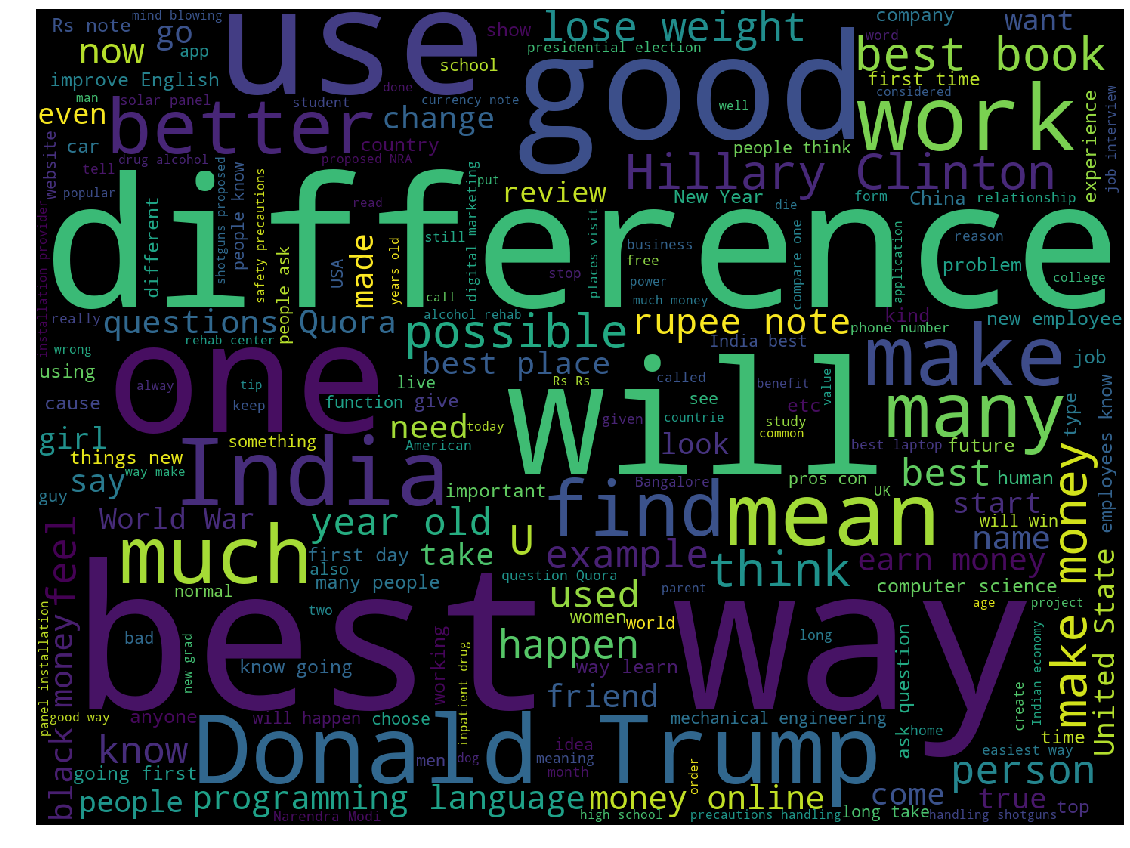

In [19]:
#printing the most common words
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(qs_wordCloud.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')